In [5]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [6]:
# train_dir = 'base_dir/train_dir/'
# test_dir = 'base_dir/val_dir/'
# train_dir = 'n_dir3_bin120/train_dir/'
# test_dir = 'n_dir3_bin120/val_dir/'
train_dir = 'n_dir3_bin50/train_dir/'
test_dir = 'n_dir3_bin50/val_dir/'
folders = [train_dir, test_dir]

In [7]:
def create_arr(fol, lab):
    label = np.array([lab])
    label = np.where(label=='Normal',0,label)
    label = np.where(label=='Tuberculosis',1,label)
    label0 = np.uint8(label)
    label1 = np.uint8(label) # to avoid memory leak
    folder = fol+lab+'/'
    files = [f for f in os.listdir(folder) if 'png' in f or 'jpg' in f]
    img = cv2.imread(folder+files[0], cv2.IMREAD_GRAYSCALE).reshape(1,299,299)
    for i in range(1, len(files)):
        img1 = cv2.imread(folder+files[i], cv2.IMREAD_GRAYSCALE).reshape(1,299,299)
        img = np.concatenate((img, img1))
        label0 = np.concatenate((label0, label1))
    return img, label0

In [8]:
labels = np.array(os.listdir(folders[0]))

In [9]:
labels[1]

'Normal'

In [10]:
x_test0, y_test0 = create_arr(folders[1], labels[0])
x_test1, y_test1 = create_arr(folders[1], labels[1])
x_test = np.concatenate((x_test0, x_test1))
y_test = np.concatenate((y_test0, y_test1))

np.save('npy/x_test_bin50.npy', x_test)
np.save('npy/y_test_bin50.npy', y_test)

In [11]:
x_train0, y_train0 = create_arr(folders[0], labels[0])
x_train1, y_train1 = create_arr(folders[0], labels[1])
x_train = np.concatenate((x_train0, x_train1))
y_train = np.concatenate((y_train0, y_train1))

np.save('npy/x_train_bin50.npy', x_train)
np.save('npy/y_train_bin50.npy', y_train)

In [12]:
y_train.shape

(680,)

In [13]:
x_train.shape

(680, 299, 299)

In [14]:
y_train[10]

1

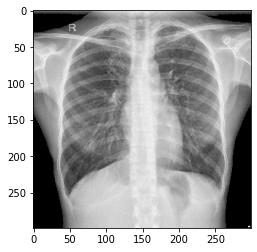

In [15]:
plt.imshow(x_train[10], cmap='gray')